<a href="https://colab.research.google.com/github/shihchun/image-processing/blob/master/Add_Salt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Add salt

len: ==image width or x : 512 
SNR： -9.645236300248335 
shape of ori "original": (512, 512, 3) 
shape or gauss "gauss_salt_image": (512, 512, 3)
['.config', 'pickle_snr.pickle', 'pickle_gauss_salt.pickle', 'pickle_noise.pickle', 'pickle_original.pickle', 'sample_data']


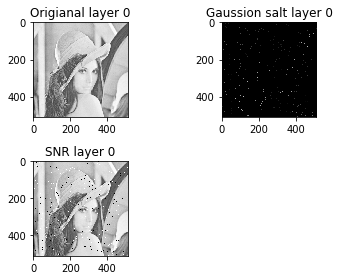

In [0]:
# generate noise image 用ori圖 產生 gauss salt圖、兩者 SNR   填寫到model
import numpy as np
import os
import cv2
import random
def noisy(image,prob): # 高斯 加鹽
  output = np.zeros(image.shape,np.uint8)
  thres = 1 - prob 
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      rdn = random.random()
      if rdn < prob:
          output[i][j] = 0
      elif rdn > thres:
          output[i][j] = 255
      else:
          output[i][j] = image[i][j]
  return output
  pass
def im2double(im):
    min_val = np.min(im.ravel())
    max_val = np.max(im.ravel())
    out = (im.astype('float') - min_val) / (max_val - min_val)
    return out
# load image
from skimage import io
# use lena image
originalsrc = 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png'
# originalsrc = 'http://7.daliansky.net/10.15/Catalina_1920.jpg'
original = io.imread(originalsrc)

## calculate SNR
image = original ## input orignal image
mean_image = np.mean(image)

noisy_image = noisy(image,0.01)  ## input noisy image
noise = noisy_image - image
mean_noise = np.mean(noise)
noise_diff = noise - mean_noise
var_noise = np.sum(np.mean(noise_diff**2)) ## variance of noise

if var_noise == 0:
      snr = 100 ## clean image
else:
      snr = (np.log10(mean_image/var_noise))*20 ## SNR of the image
      
perfect = original 
print('len: ==image width or x :', len(perfect),'\nSNR：', snr, 
      '\nshape of ori "original":', np.shape(perfect), 
      '\nshape or gauss "gauss_salt_image":', np.shape(noisy_image))
#Plot
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(221)
plt.title("Origianal layer 0")
io.imshow(original[:,:,0])
plt.subplot(222)
plt.title("Gaussion salt layer 0")
io.imshow(noise[:,:,0])
plt.subplot(223)
plt.title("SNR layer 0")
io.imshow(noisy_image[:,:,0])


# Del
gauss_salt_image = noisy_image # noisy_image 跟下面重名
gauss_noise = noise
del io, np, plt, os, cv2, random
del perfect, var_noise, noise_diff, mean_noise, noise, noisy, noisy_image# 從記憶體中釋放
# snr, original, gauss_salt_image 的值下面會用到

import pickle
# pickle a variable to a file
file = open('pickle_snr.pickle', 'wb')
pickle.dump(snr, file)
file.close()
file = open('pickle_original.pickle', 'wb')
pickle.dump(original, file)
file.close()
file = open('pickle_noise.pickle', 'wb')
pickle.dump(gauss_noise, file)
file.close()
file = open('pickle_gauss_salt.pickle', 'wb')
pickle.dump(gauss_salt_image, file)
file.close()
import os
print( os.listdir('.') )
del os, pickle, snr, original, gauss_salt_image

In [0]:
!ls -lh | grep "pickle"

-rw-r--r-- 1 root root 769K Nov  4 06:50 pickle_gauss_salt.pickle
-rw-r--r-- 1 root root 769K Nov  4 06:50 pickle_noise.pickle
-rw-r--r-- 1 root root 769K Nov  4 06:50 pickle_original.pickle
-rw-r--r-- 1 root root  117 Nov  4 06:50 pickle_snr.pickle
